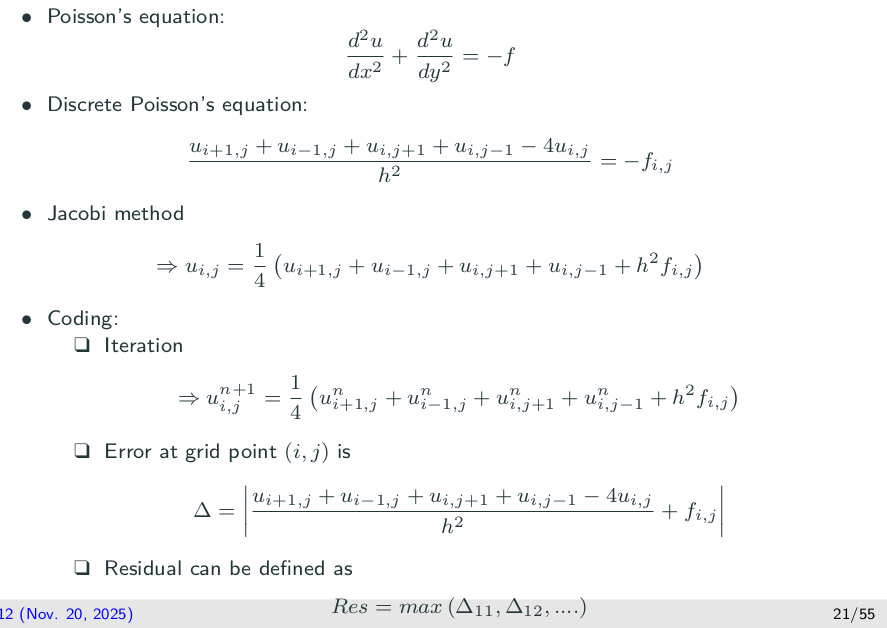

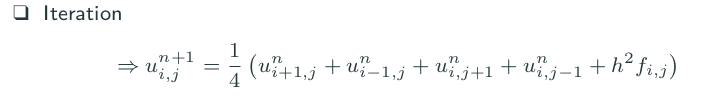

In [ ]:



Nx = 4 #10
Ny = 4 #10

Lx = 2.
Ly = 2.
h = Lx/Nx




u_old

u_new


for i in range(1, Nx):
    for j in range(1,Ny):
        #u_new_ij = 1./4. * (u_old_left + u_old_right 
        #+ u_old_top + u_old_bottom + h**2. * f_ij)
        u_old_left = u_old[i-1,j]
        u_old_right = u_old[i+1,j]
        u_old_top = u_old[i,j+1]
        u_old_bottom = u_old[i,j-1]
        
        f_ij = ????
        u_new[i,j] = 1./4. *  (u_old_left + u_old_right 
                              + u_old_top + u_old_bottom + h**2. * f_ij)
        
        
        
        



In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [7]:
def AssignSource_f(nx,ny,h):
    f_arr = np.zeros([nx+1, ny+1]) 
    for i in range(nx+1): 
        for j in range(ny+1):
            pos_x = i * h - 1. # x position
            pos_y = j * h - 1. # y position   
            if ((pos_x - 0.5)*(pos_x + 0.5)<=0) and ((pos_y - 0.5)*(pos_y + 0.5)<=0):
                f_arr[i,j] = 1.
    return f_arr

nx  = 10
ny = 10
h = 2./10.
f_arr = AssignSource_f(nx,ny,h)
print (f_arr)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
# Jacobi's Method
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
nx = 20 # total 50 intervals
ny = 20 # total 50 intervals
L = 2. # meters
h = L/(nx)
x = np.arange(nx+1) * h - 1.
y = np.arange(ny+1) * h - 1.



#====
def AssignSource_f(nx,ny,h):
    f_arr = np.zeros([nx+1, ny+1])
    for i in range(nx+1): 
        for j in range(ny+1):
            pos_x = i * h - 1. # x position
            pos_y = j * h - 1. # y position
            if ((pos_x - 0.5)*(pos_x + 0.5)<=0) and ((pos_y - 0.5)*(pos_y + 0.5)<=0):
                f_arr[i,j] = 1.
    return f_arr



#===
u_old = np.ones([nx+1, ny+1])
u_new = np.zeros([nx+1 , ny+1])
f_arr = AssignSource_f(nx,ny,h)

#===
Iter_Max = 1001
for iter in range(Iter_Max):
    res = 0.
    for i in range(1,nx): # except boundary
        for j in range(1,ny): # except boundary 
            f_val = f_arr[i,j]  
            delta = (u_old[i+1,j] + u_old[i-1,j] + u_old[i,j+1] 
                     + u_old[i,j-1]-4.*u_old[i,j])/h**2 + f_val
            
            #===
            u_new[i,j] = 1./4 *(u_old[i+1,j] + u_old[i-1,j] 
                                + u_old[i,j+1] + u_old[i,j-1] 
                                + h**2. * f_val)
            res = max(res,abs(delta))       
    u_old[:] = u_new[:]
    
    
    if iter%100 == 0:
        print ("iter = {}, res = {:5.2e}".format(iter, res))  
    
# update boundar conditions to u_new for sure, but in this case, 
#we can skip this because u on boundaries is zero.    
            
            


iter = 0, res = 1.00e+00
iter = 100, res = 2.00e+00
iter = 200, res = 5.94e-01
iter = 300, res = 1.72e-01
iter = 400, res = 4.99e-02
iter = 500, res = 1.44e-02
iter = 600, res = 4.19e-03
iter = 700, res = 1.21e-03
iter = 800, res = 3.51e-04
iter = 900, res = 1.02e-04
iter = 1000, res = 2.95e-05


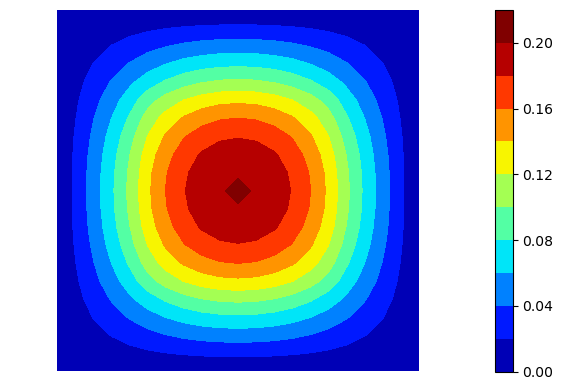

In [21]:
#===Plotting(2d)===
fig = plt.figure( dpi = 100 ) # dots per inch
fig.set_size_inches(6,4)
Z = np.copy(u_new)
X, Y = np.meshgrid(x,y)
clb = plt.contourf(X,Y, Z, 10, cmap = 'jet')
#plt.colorbar()
plt.colorbar()
plt.clim(0,0.2)
plt.ylabel('y')
plt.xlabel('x')
plt.axis('equal')
plt.axis('off')
plt.tight_layout()